In [2]:
!pip install pysal

     |████████████████████████████████| 2.4 MB 7.5 MB/s 
     |████████████████████████████████| 95 kB 3.6 MB/s 
     |████████████████████████████████| 60 kB 6.7 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 164 kB 39.3 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 41 kB 510 kB/s 
     |████████████████████████████████| 209 kB 49.7 MB/s 
     |████████████████████████████████| 5.7 MB 24.4 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 138 kB 51.2 MB/s 
     |████████████████████████████████| 226 kB 47.1 MB/s 
     |████████████████████████████████| 240 kB 47.7 MB/s 
     |████████████████████████████████| 56.1 MB 29 kB/s 
     |████████████████████████████████| 111 kB 75.7 MB/s 
     |████████████████████████████████| 183 kB 66.0 MB/s 
     |████████████████████████████████| 994 kB 37.8 MB/s 
     |██████████████████████

In [3]:
!pip install contextily

In [10]:
import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import libpysal


In [11]:
db = gpd.read_file('/content/drive/MyDrive/02.공빅데/nlsp_021001001.shp',encoding='utf-8')
#db = pd.read_csv('/content/drive/MyDrive/02.공빅데/격자.csv',encoding='cp949',index_col=False)

In [12]:
db['val'] = db['val'].fillna(0)
#db = db.set_index("gid",drop=False)

db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       2605 non-null   object  
 1   lbl       1241 non-null   object  
 2   val       2605 non-null   float64 
 3   geometry  2605 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 81.5+ KB


In [13]:
db.crs # 좌표계

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

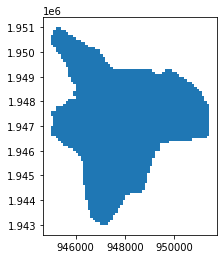

In [14]:
db.plot()

In [22]:
w = weights.Queen.from_dataframe(db)
w.transform = 'R' 

In [23]:
Wmatrix, ids = w.full()

In [24]:
val_list = []
for i in range(len(db)):
  val_list.append(sum(pd.Series(Wmatrix[i]) * db['val']) + db['val'][i])

In [25]:
db['result'] = val_list

In [26]:
db

,gid,lbl,val,geometry,result
0,다사469469,383.00,383.0,"POLYGON ((946900.000 1946900.000, 946900.000 1...",515.375
1,다사466473,42.00,42.0,"POLYGON ((946600.000 1947300.000, 946600.000 1...",472.875
2,다사471472,28.00,28.0,"POLYGON ((947100.000 1947200.000, 947100.000 1...",371.375
3,다사479468,21.00,21.0,"POLYGON ((947900.000 1946800.000, 947900.000 1...",213.000
4,다사478439,60.00,60.0,"POLYGON ((947800.000 1943900.000, 947800.000 1...",181.500
...,...,...,...,...,...
2600,다사506468,None,0.0,"POLYGON ((950600.000 1946800.000, 950600.000 1...",0.000
2601,다사473458,None,0.0,"POLYGON ((947300.000 1945800.000, 947300.000 1...",509.250
2602,다사493475,None,0.0,"POLYGON ((949300.000 1947500.000, 949300.000 1...",0.000
2603,다사501474,None,0.0,"POLYGON ((950100.000 1947400.000, 950100.000 1...",0.000


In [ ]:
tmp = pd.DataFrame(Wmatrix[2601])
aa = tmp.join(db['val'])
aa[aa.iloc[:,0] !=0]

,0,val
52,0.125,204.0
333,0.125,577.0
374,0.125,352.0
586,0.125,305.0
985,0.125,524.0
989,0.125,840.0
1184,0.125,856.0
1193,0.125,416.0


In [ ]:
db

,gid,lbl,val,geometry,result
0,다사469469,383.00,383.0,"POLYGON ((946900.000 1946900.000, 946900.000 1...",515.375
1,다사466473,42.00,42.0,"POLYGON ((946600.000 1947300.000, 946600.000 1...",472.875
2,다사471472,28.00,28.0,"POLYGON ((947100.000 1947200.000, 947100.000 1...",371.375
3,다사479468,21.00,21.0,"POLYGON ((947900.000 1946800.000, 947900.000 1...",213.000
4,다사478439,60.00,60.0,"POLYGON ((947800.000 1943900.000, 947800.000 1...",181.500
...,...,...,...,...,...
2600,다사506468,None,0.0,"POLYGON ((950600.000 1946800.000, 950600.000 1...",0.000
2601,다사473458,None,0.0,"POLYGON ((947300.000 1945800.000, 947300.000 1...",509.250
2602,다사493475,None,0.0,"POLYGON ((949300.000 1947500.000, 949300.000 1...",0.000
2603,다사501474,None,0.0,"POLYGON ((950100.000 1947400.000, 950100.000 1...",0.000


In [ ]:
Wmatrix[i]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Wmatrix[0]*db['val']

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
pd.DataFrame(Wmatrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(db)):
  print(w[i])
  break

{832: 0.25, 13: 0.25, 1005: 0.25, 326: 0.25}


In [ ]:
db

,gid,lbl,val,geometry
0,다사469469,383.00,383.0,"POLYGON ((946900.000 1946900.000, 946900.000 1..."
1,다사466473,42.00,42.0,"POLYGON ((946600.000 1947300.000, 946600.000 1..."
2,다사471472,28.00,28.0,"POLYGON ((947100.000 1947200.000, 947100.000 1..."
3,다사479468,21.00,21.0,"POLYGON ((947900.000 1946800.000, 947900.000 1..."
4,다사478439,60.00,60.0,"POLYGON ((947800.000 1943900.000, 947800.000 1..."
...,...,...,...,...
2600,다사506468,None,0.0,"POLYGON ((950600.000 1946800.000, 950600.000 1..."
2601,다사473458,None,0.0,"POLYGON ((947300.000 1945800.000, 947300.000 1..."
2602,다사493475,None,0.0,"POLYGON ((949300.000 1947500.000, 949300.000 1..."
2603,다사501474,None,0.0,"POLYGON ((950100.000 1947400.000, 950100.000 1..."


In [ ]:
db['val'] = db['val'].astype(int)
y = np.log1p(db['val'])
y

0       5.950643
1       3.761200
2       3.367296
3       3.091042
4       4.110874
          ...   
2600    0.000000
2601    0.000000
2602    0.000000
2603    0.000000
2604    0.000000
Name: val, Length: 2605, dtype: float64

In [ ]:
db['lag'] = weights.lag_spatial(w,y)

In [ ]:
db

,gid,lbl,val,geometry,lag
0,다사469469,383.00,383,"POLYGON ((946900.000 1946900.000, 946900.000 1...",3.730112
1,다사466473,42.00,42,"POLYGON ((946600.000 1947300.000, 946600.000 1...",5.599369
2,다사471472,28.00,28,"POLYGON ((947100.000 1947200.000, 947100.000 1...",5.251942
3,다사479468,21.00,21,"POLYGON ((947900.000 1946800.000, 947900.000 1...",3.883733
4,다사478439,60.00,60,"POLYGON ((947800.000 1943900.000, 947800.000 1...",3.545125
...,...,...,...,...,...
2600,다사506468,None,0,"POLYGON ((950600.000 1946800.000, 950600.000 1...",0.000000
2601,다사473458,None,0,"POLYGON ((947300.000 1945800.000, 947300.000 1...",6.015858
2602,다사493475,None,0,"POLYGON ((949300.000 1947500.000, 949300.000 1...",0.000000
2603,다사501474,None,0,"POLYGON ((950100.000 1947400.000, 950100.000 1...",0.000000


In [ ]:
mi = esda.Moran(db['lag'],w)
mi

In [ ]:
mi.I

0.8878303590208648

In [ ]:
mi.p_sim

0.001

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92bdf86f50>)

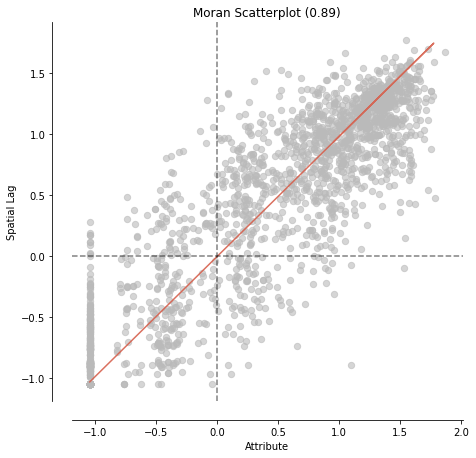

In [ ]:
moran_scatterplot(mi)

In [ ]:
lisa = esda.Moran_Local(db['lag'],w)
#db['significant'] = db['val'].apply(lambda x : x - np.mean(db['val']))
db['significant'] = lisa.p_sim < 0.05
db['quadrant'] = lisa.q

In [ ]:
db[db['quadrant']==1]

,gid,lbl,val,geometry,lag,significant,quadrant
0,다사469469,383.00,383,"POLYGON ((946900.000 1946900.000, 946900.000 1...",3.730112,True,1
1,다사466473,42.00,42,"POLYGON ((946600.000 1947300.000, 946600.000 1...",5.599369,True,1
2,다사471472,28.00,28,"POLYGON ((947100.000 1947200.000, 947100.000 1...",5.251942,True,1
3,다사479468,21.00,21,"POLYGON ((947900.000 1946800.000, 947900.000 1...",3.883733,False,1
4,다사478439,60.00,60,"POLYGON ((947800.000 1943900.000, 947800.000 1...",3.545125,False,1
...,...,...,...,...,...,...,...
2526,다사455465,None,0,"POLYGON ((945500.000 1946500.000, 945500.000 1...",4.255627,False,1
2542,다사470482,None,0,"POLYGON ((947000.000 1948200.000, 947000.000 1...",6.465316,False,1
2556,다사479440,None,0,"POLYGON ((947900.000 1944000.000, 947900.000 1...",6.608036,False,1
2561,다사464465,None,0,"POLYGON ((946400.000 1946500.000, 946400.000 1...",3.116024,False,1


In [ ]:
result = []
for i in range(len(db)):
  result.append(lisa.p_sim[i] < 0.05 and lisa.q[i]==4)

In [ ]:
db['significant'] = result

In [ ]:
db[db['significant']==True]

,gid,lbl,val,geometry,lag,significant,quadrant
29,다사496469,N/A,0,"POLYGON ((949600.000 1946900.000, 949600.000 1...",3.021384,True,4
43,다사488480,17.00,17,"POLYGON ((948800.000 1948000.000, 948800.000 1...",3.960690,True,4
1006,다사487479,N/A,0,"POLYGON ((948700.000 1947900.000, 948700.000 1...",5.003411,True,4
1381,다사487481,None,0,"POLYGON ((948700.000 1948100.000, 948700.000 1...",2.639889,True,4
2038,다사486480,None,0,"POLYGON ((948600.000 1948000.000, 948600.000 1...",2.704604,True,4


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92bdf52810>)

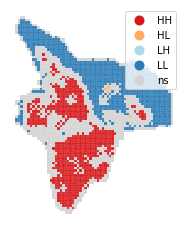

In [ ]:
lisa_cluster(lisa,db)

In [ ]:
db[['gid','lbl','val','significant']]

,gid,lbl,val,significant
0,다사469469,383.00,383,False
1,다사466473,42.00,42,False
2,다사471472,28.00,28,False
3,다사479468,21.00,21,False
4,다사478439,60.00,60,False
...,...,...,...,...
2600,다사506468,None,0,False
2601,다사473458,None,0,False
2602,다사493475,None,0,False
2603,다사501474,None,0,False


In [ ]:
db

,gid,lbl,val,geometry,result
0,다사469469,383.00,383.0,"POLYGON ((946900.000 1946900.000, 946900.000 1...",515.375
1,다사466473,42.00,42.0,"POLYGON ((946600.000 1947300.000, 946600.000 1...",472.875
2,다사471472,28.00,28.0,"POLYGON ((947100.000 1947200.000, 947100.000 1...",371.375
3,다사479468,21.00,21.0,"POLYGON ((947900.000 1946800.000, 947900.000 1...",213.000
4,다사478439,60.00,60.0,"POLYGON ((947800.000 1943900.000, 947800.000 1...",181.500
...,...,...,...,...,...
2600,다사506468,None,0.0,"POLYGON ((950600.000 1946800.000, 950600.000 1...",0.000
2601,다사473458,None,0.0,"POLYGON ((947300.000 1945800.000, 947300.000 1...",509.250
2602,다사493475,None,0.0,"POLYGON ((949300.000 1947500.000, 949300.000 1...",0.000
2603,다사501474,None,0.0,"POLYGON ((950100.000 1947400.000, 950100.000 1...",0.000


In [ ]:
db[['gid','lbl','val','significant']].to_csv('/content/drive/MyDrive/02.공빅데/hh_df.csv',encoding='utf-8',index=False)

In [ ]:
db.to_csv('/content/drive/MyDrive/02.공빅데/hh_df.csv',encoding='utf-8',index=False)

In [ ]:
def Shp2dataframe(path):
    fields=arcpy.ListFields(path)
    table=[]
    fieldname=[field.name for field in fields]
    data=arcpy.SearchCursor(path)
    for row in data:
        r=[]
        for field in fields:
            r.append(row.getValue(field.name))
        table.append(r)
    return pd.DataFrame(table,columns=fieldname)

"""Fuction:
make the table of pandas's DataFrame convert to the shp of esri
Input:
df -- pandas DataFrame from the shp converted
outpath -- the shp output path
geometryType -- the type of geomentey, eg:'POINT','POLYLINE','POLYGON','MULTIPOINT'
temple -- the temple, at most time it is used the DataFrame's shp
"""

def Dataframe2ShpTemplate(df,outpath,geoType,template):
out_path = outpath.replace(outpath.split('/')[-1],'')
out_name = outpath.split('/')[-1]
geometry_type = geoType
feature_class = arcpy.CreateFeatureclass_management(
    out_path, out_name, geometry_type, template)
desc = arcpy.Describe(outpath)

if template=='':
    fields = set(list(df.columns)+['Shape','FID'])
    originfieldnames = [field.name for field in desc.fields]
    for fieldname in fields:
        if fieldname not in originfieldnames:
            arcpy.AddField_management(outpath,fieldname,'TEXT')
for row in df.index:
    df['SHAPE@'] = df['Shape']
    cursor = arcpy.da.InsertCursor(outpath,[field for field in df.columns])
    cursor.insertRow([df[field][row] for field in df.columns])
print ('Pandas to shp finish!')

del cursor

IndentationError: ignored